In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [2]:
pr_rems = pd.read_parquet('train/pr_rems.parquet').convert_dtypes()
tr_rems = pd.read_parquet('train/tr_rems.parquet').convert_dtypes()
y_train = pd.read_csv('train/target/y_train.csv')
pr_rems = pr_rems.sort_values(by='rem_month')
tr_rems = tr_rems.sort_values(by='rem_month')
y_train = y_train.sort_values(by='month')

In [9]:
del pr_rems
del tr_rems
del y_train

In [191]:
y_train

,wagnum,month,target_month,target_day
50962,15844,2022-08-01,0,0
45317,22524,2022-08-01,1,0
50961,15838,2022-08-01,0,0
45289,2049,2022-08-01,0,0
45290,7974,2022-08-01,0,0
...,...,...,...,...
22655,18705,2023-01-01,0,0
22656,18719,2023-01-01,0,0
22657,18733,2023-01-01,0,0
22693,33478,2023-01-01,0,0


# Pr_rems

In [93]:
TP = 0
FP = 0
for wag in tqdm(y_train.wagnum.unique()):
    for month in pr_rems[pr_rems.wagnum == wag].rem_month:
        for ind, now_month in enumerate(y_train[y_train.wagnum == wag].month):
            if str(now_month)[:7] == str(month)[:7]:
                if y_train[y_train.wagnum == wag].iloc[ind, 2] == 1:
                    TP += 1
                else:
                    FP += 1

100%|██████████| 33977/33977 [00:22<00:00, 1535.63it/s]


In [97]:
TP, FP, y_train[y_train.target_month == 1].shape[0]  # => Все поломки в таблице -- это лики
                                                     # Иногда происходит несколько поломок за месяц

(10441, 0, 10401)

In [95]:
pr_rems

,wagnum,rem_month,rod_id,model,road_id_send,road_id_rem,kod_vrab,st_id_send,st_id_rem,distance,month
0,15000,2022-08-05,1,12-132,3,3,0,493,493,37,8
2,25485,2022-08-21,1,12-132-03,13,13,0,6152,4793,360,8
3,25944,2022-08-09,1,12-132-03,13,13,1,6152,4793,322,8
4,24080,2022-08-13,1,12-296-01,13,13,0,6152,4793,308,8
5,28612,2022-08-09,1,12-132,13,13,0,6152,4793,373,8
...,...,...,...,...,...,...,...,...,...,...,...
1578,11193,2023-01-30,1,12-132,12,12,0,12607,12607,885,1
509,24703,2023-01-24,1,12-9780,6,6,1,4025,4025,890,1
511,26437,2023-01-29,1,12-9780,6,6,1,4025,4025,892,1
711,29345,2023-01-15,1,12-132,13,13,1,6152,5960,397,1


In [59]:
pr_rems.rod_id.value_counts()  # Поломок РПС значительно больше

1    8069
0    2372
Name: rod_id, dtype: Int64

In [257]:
pr_rems.kod_vrab.value_counts()

0    6857
1    3584
Name: kod_vrab, dtype: Int64

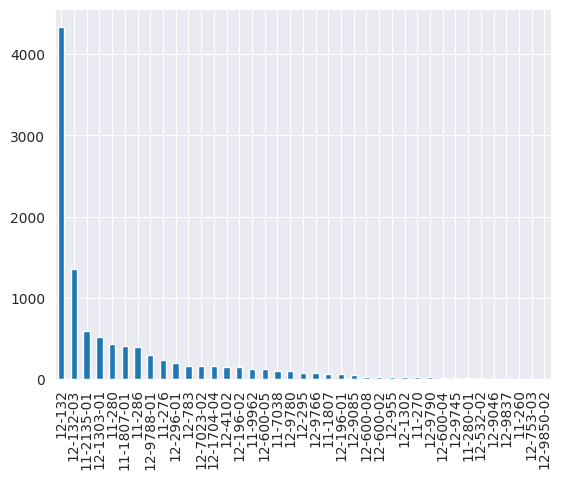

In [104]:
pr_rems.model.value_counts().plot(kind='bar');

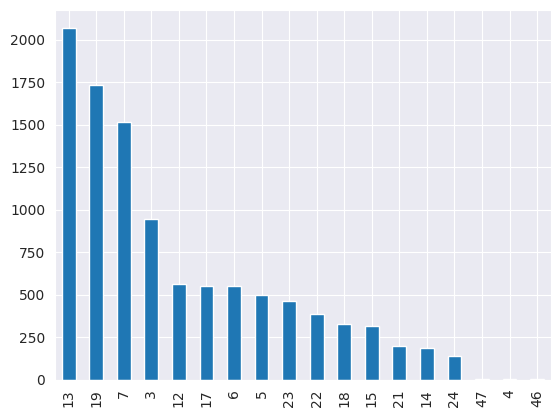

In [106]:
pr_rems.road_id_send.value_counts().plot(kind='bar');

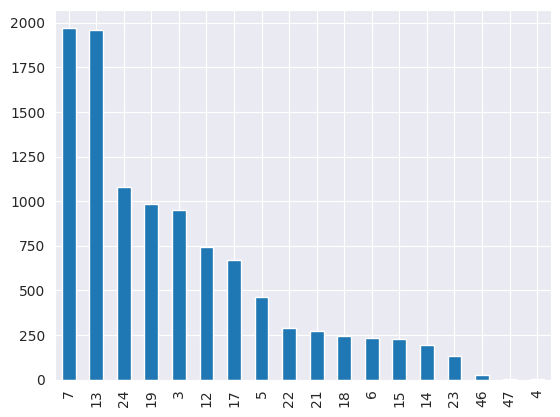

In [110]:
pr_rems.road_id_rem.value_counts().plot(kind='bar');

In [109]:
pr_rems[pr_rems.road_id_send != pr_rems.road_id_rem].shape[0],\
    pr_rems[pr_rems.road_id_send == pr_rems.road_id_rem].shape[0]
# Отличаются / сходятся дороги

(2502, 7939)

In [116]:
pr_rems.st_id_send.value_counts()

6152     1568
4421     1162
4420      593
10016     310
498       266
         ... 
3255        1
9032        1
9540        1
2688        1
12564       1
Name: st_id_send, Length: 911, dtype: Int64

In [117]:
pr_rems.st_id_rem.value_counts()

10364    911
6279     640
4387     586
392      560
4391     487
        ... 
12383      1
4262       1
4253       1
3466       1
1213       1
Name: st_id_rem, Length: 415, dtype: Int64

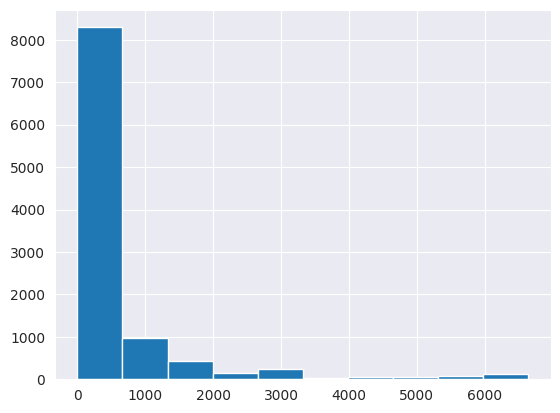

In [140]:
pr_rems.distance.hist();

# Tr_rems

In [141]:
tr_rems

,wagnum,rem_month,kod_vrab,neis1_kod,neis2_kod,neis3_kod,mod1_kod,mod2_kod,mod3_kod,mod4_kod,mod5_kod,mod6_kod,mod7_kod,road_id_send,gr_probeg,por_probeg,st_id_send
0,29938,2022-08-01,3,0,98,54,7,4,2,0,0,0,0,38,87913,37467,10522
1,29938,2022-08-01,3,14,98,54,7,4,2,0,0,0,0,38,87913,37467,10441
2,29852,2022-08-01,2,0,98,54,7,4,2,0,0,0,0,28,81824,45579,4789
3,29852,2022-08-01,2,36,98,54,7,4,2,0,0,0,0,28,81824,45579,4789
4,13674,2022-08-01,2,95,98,54,7,4,2,0,0,0,0,28,64130,34697,4789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,31868,2023-01-01,3,14,98,54,7,4,2,0,0,0,0,42,88690,60006,11552
7696,22921,2023-01-01,5,0,98,54,7,4,2,0,0,0,0,28,93198,53596,6168
7697,22921,2023-01-01,3,34,95,54,7,4,2,0,0,0,0,28,93198,53596,6168
7698,4978,2023-01-01,3,131,68,54,7,4,2,0,0,0,0,3,72453,38209,262


In [47]:
tr_rems.kod_vrab.value_counts()

3    26538
2    19135
5     2979
Name: kod_vrab, dtype: Int64

In [231]:
tr_rems.neis1_kod.value_counts()

0      24398
2       5654
95      3992
6       3136
88      1792
       ...  
113        1
17         1
91         1
23         1
64         1
Name: neis1_kod, Length: 120, dtype: Int64

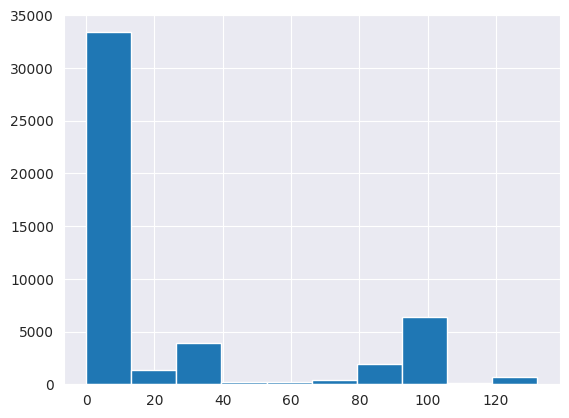

In [232]:
tr_rems.neis1_kod.hist();

In [145]:
tr_rems.wagnum.nunique()

17849

In [221]:
tr_rems.mod2_kod.value_counts()
# mod2 - mod7 -- почти одно значение (или реально только одно)
# mod2 -- больше всего 4
# mod3 -- больше всего 2
# neis2_kod -- больше всего 98, 95, 96, 62
# neis3_kod -- больше всего 54, 51

7    44660
1     2447
4      755
2      525
3      146
6       64
5       54
0        1
Name: mod1_kod, dtype: Int64

In [162]:
tr_rems.dropna(subset=['gr_probeg', 'por_probeg']).wagnum.nunique()
# Довольно мало nan

17672

In [208]:
tr_rems

,wagnum,rem_month,rod_id,model,road_id_send,road_id_rem,kod_vrab,st_id_send,st_id_rem,distance,month
1389,33769,2022-08-02,1,12-132,7,7,0,4420,4387,179,8
147,3996,2022-08-02,0,11-1807-01,15,15,0,7602,7827,473,8
679,24232,2022-08-02,1,12-132,7,7,1,4420,4391,125,8
1434,3919,2022-08-02,0,11-1807-01,6,6,0,3823,3823,409,8
784,3932,2022-08-02,0,11-1807-01,12,12,0,5272,12606,226,8
...,...,...,...,...,...,...,...,...,...,...,...
1287,27183,2023-01-31,1,12-132,6,7,0,4421,12597,739,1
788,25669,2023-01-31,1,12-132-03,13,12,0,5032,12605,858,1
187,28182,2023-01-31,1,12-132-03,19,19,0,10016,10364,217,1
1261,23549,2023-01-31,1,12-132,6,7,1,4420,12597,766,1


In [211]:
after_date = 0
before_date = 0
for wag in tqdm(y_train.wagnum.unique()):
    for month in tr_rems[tr_rems.wagnum == wag].rem_month:
        for ind, now_month in enumerate(y_train[y_train.wagnum == wag].month):
            if y_train[y_train.wagnum == wag].iloc[ind, 2] == 1:
                if str(now_month)[:7] > str(month)[:7]:
                    before_date += 1
                else:
                    after_date += 1

100%|██████████| 33977/33977 [01:50<00:00, 306.26it/s]


In [213]:
before_date, after_date
# tr_rems и предсказания y_train независимы

(7183, 5923)

# Генерация признаков для айдишников без лик

In [3]:
def f(x):
    if x.dropna().shape[0] == 0:
        return x.fillna(0)
    return x.fillna(int(x.dropna().mean()))

In [4]:
tr_rems['gr_probeg'] = tr_rems.groupby(['wagnum', 'rem_month'])['gr_probeg'].transform(f)
tr_rems['por_probeg'] = tr_rems.groupby(['wagnum', 'rem_month'])['por_probeg'].transform(f)

In [6]:
tr_data = tr_rems.groupby(['wagnum', 'rem_month']).agg(
    kod_vrab_2_tr=('kod_vrab', lambda x: (x == 2).sum()),
    kod_vrab_3_tr=('kod_vrab', lambda x: (x == 3).sum()),
    kod_vrab_5_tr=('kod_vrab', lambda x: (x == 5).sum()),
    neis1_kod_0_tr=('neis1_kod', lambda x: (x == 0).sum()),
    neis1_kod_2_tr=('neis1_kod', lambda x: (x == 2).sum()),
    neis1_kod_95_tr=('neis1_kod', lambda x: (x == 95).sum()),
    neis1_kod_6_tr=('neis1_kod', lambda x: (x == 6).sum()),
    neis1_kod_88_tr=('neis1_kod', lambda x: (x == 88).sum()),
    neis1_kod_tr_max=('neis1_kod', 'max'),
    neis2_kod_98_tr=('neis2_kod', lambda x: (x == 98).sum()),
    neis2_kod_95_tr=('neis2_kod', lambda x: (x == 95).sum()),
    neis2_kod_96_tr=('neis2_kod', lambda x: (x == 96).sum()),
    neis2_kod_62_tr=('neis2_kod', lambda x: (x == 62).sum()),
    neis2_kod_tr_max=('neis2_kod', 'max'),
    neis3_kod_54_tr=('neis3_kod', lambda x: (x == 54).sum()),
    neis3_kod_51_tr=('neis3_kod', lambda x: (x == 51).sum()),
    neis3_kod_tr_max=('neis3_kod', 'max'),
    mod1_kod_tr_min=('mod1_kod', 'min'),
    mod1_kod_tr_max=('mod1_kod', 'max'),
    mod2_kod_tr_min=('mod2_kod', 'min'),
    mod2_kod_tr_max=('mod2_kod', 'max'),
    gr_probeg_tr_max=('gr_probeg', 'max'),
    gr_probeg_tr_mean=('gr_probeg', 'mean'),
    gr_probeg_tr_min=('gr_probeg', 'min'),
    por_probeg_tr_max=('por_probeg', 'max'),
    por_probeg_tr_mean=('por_probeg', 'mean'),
    por_probeg_tr_min=('por_probeg', 'min'),
    _1m_tr_rems=('rem_month', 'count')
).reset_index().rename(columns={'rem_month': 'month'})

In [7]:
tr_data['month'] = tr_data.month.apply(lambda x: str(x)[:10])

In [ ]:
'''def g(x):
    print(x)
    for i in range(x.shape[0] - 1, 0, -1):
        if abs(int(str(x.iloc[i, 0])[6:8]) - int(str(x.iloc[i-1, 0])[6:8])) % 11 == 1:
            x.iloc[i, 1] += x.iloc[i-1, 1]
    return x
tr_data['_2m_tr_rems'] = tr_data.groupby('wagnum')[['month', '_1m_tr_rems']].transform(g)
#tr_data['_2m_tr_rems'] = tr_data.groupby('wagnum').agg(aba=g)'''

In [8]:
pr_rems['month_str'] = pr_rems.rem_month.apply(lambda x: str(x)[:10])
pr_rems['just_month_str'] = pr_rems.month_str.apply(lambda x: x[:-2] + '01')
pr_rems['diff_road'] = (pr_rems.road_id_rem != pr_rems.road_id_send).astype(int)
pr_rems['diff_st'] = (pr_rems.st_id_rem != pr_rems.st_id_send).astype(int)

In [9]:
pr_rems

,wagnum,rem_month,rod_id,model,road_id_send,road_id_rem,kod_vrab,st_id_send,st_id_rem,distance,month,month_str,just_month_str,diff_road,diff_st
1117,33769,2022-08-02,1,12-132,7,7,0,4420,4387,179,8,2022-08-02,2022-08-01,0,1
1476,29274,2022-08-02,1,12-132,18,18,1,9189,12647,175,8,2022-08-02,2022-08-01,0,1
1477,22096,2022-08-02,1,12-132,18,17,1,8921,12647,157,8,2022-08-02,2022-08-01,1,1
1478,23969,2022-08-02,1,12-132,18,18,1,9043,12647,19,8,2022-08-02,2022-08-01,0,1
1375,27915,2022-08-02,1,12-132-03,23,24,0,12393,11891,60,8,2022-08-02,2022-08-01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,27094,2023-02-28,1,12-132-03,23,24,0,12380,12012,6067,2,2023-02-28,2023-02-01,1,1
11894,2044,2023-02-28,0,11-2135-01,6,7,0,4147,3457,1433,2,2023-02-28,2023-02-01,1,1
11893,2012,2023-02-28,0,11-2135-01,6,7,0,12920,3457,2503,2,2023-02-28,2023-02-01,1,1
11936,21076,2023-02-28,1,12-9788-01,22,24,0,13202,11305,5835,2,2023-02-28,2023-02-01,1,1


In [10]:
pr_data = pr_rems.groupby(['wagnum', 'just_month_str']).agg(
    kod_vrab_0_pr=('kod_vrab', lambda x: (x == 0).sum()),
    kod_vrab_1_pr=('kod_vrab', lambda x: (x == 1).sum()),
    diff_road_pr=('diff_road', 'sum'),
    diff_st_pr=('diff_st', 'sum'),
    _10d_pr_rems=('month_str', lambda x: (x >= x.max()[:-2] + '20').sum()),
    _20d_pr_rems=('month_str', lambda x: (x >= x.max()[:-2] + '10').sum()),
    _1m_pr_rems=('rem_month', 'count'),
    rem_dist_pr_sum=('distance', 'sum'),
    rem_dist_pr_mean=('distance', 'mean'),
    last_month_for_cnt=('month_str', 'max')
).reset_index().rename(columns={'just_month_str': 'month'})

In [33]:
y_test = pd.read_csv('train/target/y_predict_submit_example.csv')
y_test['target_month'] = 0
y_test['target_day'] = 0
y_all = pd.concat([y_train, y_test], ignore_index=True)

In [34]:
y_all = y_all.merge(tr_data, on=['wagnum', 'month'], how='left').merge(pr_data, on=['wagnum', 'month'], how='left')

In [35]:
y_all['_allm_pr_rems'] = y_all['_1m_pr_rems'].copy()
y_all['_allm_tr_rems'] = y_all['_1m_tr_rems'].copy()

In [36]:
y_all['months_after_tr_rems'] = y_all['_1m_tr_rems'].copy()
y_all['months_after_pr_rems'] = y_all['_1m_pr_rems'].copy()

In [37]:
y_all

,wagnum,month,target_month,target_day,kod_vrab_2_tr,kod_vrab_3_tr,kod_vrab_5_tr,neis1_kod_0_tr,neis1_kod_2_tr,neis1_kod_95_tr,...,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,rem_dist_pr_sum,rem_dist_pr_mean,last_month_for_cnt,_allm_pr_rems,_allm_tr_rems,months_after_tr_rems,months_after_pr_rems
0,15844,2022-08-01,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
1,2049,2022-08-01,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,1.0,1.0,NaN
2,7974,2022-08-01,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
3,931,2022-08-01,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
4,26853,2022-08-01,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271263,17621,2023-03-01,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
271264,25045,2023-03-01,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
271265,27156,2023-03-01,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
271266,21361,2023-03-01,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN


In [38]:
y_all.columns

Index(['wagnum', 'month', 'target_month', 'target_day', 'kod_vrab_2_tr',
       'kod_vrab_3_tr', 'kod_vrab_5_tr', 'neis1_kod_0_tr', 'neis1_kod_2_tr',
       'neis1_kod_95_tr', 'neis1_kod_6_tr', 'neis1_kod_88_tr',
       'neis1_kod_tr_max', 'neis2_kod_98_tr', 'neis2_kod_95_tr',
       'neis2_kod_96_tr', 'neis2_kod_62_tr', 'neis2_kod_tr_max',
       'neis3_kod_54_tr', 'neis3_kod_51_tr', 'neis3_kod_tr_max',
       'mod1_kod_tr_min', 'mod1_kod_tr_max', 'mod2_kod_tr_min',
       'mod2_kod_tr_max', 'gr_probeg_tr_max', 'gr_probeg_tr_mean',
       'gr_probeg_tr_min', 'por_probeg_tr_max', 'por_probeg_tr_mean',
       'por_probeg_tr_min', '_1m_tr_rems', 'kod_vrab_0_pr', 'kod_vrab_1_pr',
       'diff_road_pr', 'diff_st_pr', '_10d_pr_rems', '_20d_pr_rems',
       '_1m_pr_rems', 'rem_dist_pr_sum', 'rem_dist_pr_mean',
       'last_month_for_cnt', '_allm_pr_rems', '_allm_tr_rems',
       'months_after_tr_rems', 'months_after_pr_rems'],
      dtype='object')

In [29]:
def shift_and_k_nan(k):
    def ff(x):
        x.iloc[1:] = x.iloc[:-1]
        x.iloc[0] = k
        x = x.fillna(k)
        return x
    return ff
ff = shift_and_k_nan(1000)
ff(pd.Series([1, 2, 3, 4, np.nan, 5]))

0    1000.0
1       1.0
2       2.0
3       3.0
4       4.0
5    1000.0
dtype: float64

In [17]:
def shift_and_cnt_after(x):
    x = x.fillna(0)
    x.iloc[1:] = x.iloc[:-1]
    x.iloc[0] = 0
    prev = 365*2
    for i in range(x.shape[0]):
        if x.iloc[i] > 0:
            prev = 0
        x.iloc[i] = prev
        prev += 1
    return x
shift_and_cnt_after(pd.Series([np.nan, 1, 0, 2, np.nan, 0]))

0    730.0
1    731.0
2      0.0
3      1.0
4      0.0
5      1.0
dtype: float64

In [19]:
def shift_and_get_prev(x):
    x = x.fillna(0)
    x.iloc[1:] = x.iloc[:-1]
    x.iloc[0] = 0
    prev = 0
    for i in range(x.shape[0]):
        if x.iloc[i] > 0:
            prev = x.iloc[i]
        x.iloc[i] = prev
    return x
shift_and_get_prev(pd.Series([np.nan, 1, 0, 2, np.nan, 0]))

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
5    2.0
dtype: float64

In [27]:
def shift_and_pref_sum(x):
    x = x.fillna(0)
    x.iloc[1:] = x.iloc[:-1]
    x.iloc[0] = 0
    for i in range(1, x.shape[0]):
        x.iloc[i] += x.iloc[i-1]
    return x
shift_and_pref_sum(pd.Series([1, np.nan, 0, 4, np.nan, 5]))

0    0.0
1    1.0
2    1.0
3    1.0
4    5.0
5    5.0
dtype: float64

In [24]:
def shift_and_count_exac_days(x):
    x = x.fillna('0')
    x.iloc[1:] = x.iloc[:-1]
    x.iloc[0] = '0'
    prev = 365 * 2
    for i in range(x.shape[0]):
        if x.iloc[i] != '0':
            prev = 31 - int(x.iloc[i][8:10])
        x.iloc[i] = str(prev)
        prev += 30
    x[x == '0'] = str(365 * 2)
    return x
shift_and_count_exac_days(pd.Series([np.nan, np.nan, '2022-05-15', np.nan, np.nan, np.nan]))

0    730
1    760
2    790
3     16
4     46
5     76
dtype: object

In [32]:
column_to_function = {
    'kod_vrab_2_tr':shift_and_pref_sum,
    'kod_vrab_3_tr':shift_and_pref_sum,
    'kod_vrab_5_tr':shift_and_pref_sum,
    #'neis1_kod_0_tr':shift_and_pref_sum,
    #'neis1_kod_2_tr':shift_and_pref_sum,
    #'neis1_kod_95_tr':shift_and_pref_sum,
    #'neis1_kod_6_tr':shift_and_pref_sum,
    #'neis1_kod_88_tr':shift_and_pref_sum,
    'neis1_kod_tr_max':shift_and_get_prev,
    #'neis2_kod_98_tr':shift_and_pref_sum,
    #'neis2_kod_95_tr':shift_and_pref_sum,
    #'neis2_kod_96_tr':shift_and_pref_sum,
    #'neis2_kod_62_tr':shift_and_pref_sum,
    'neis2_kod_tr_max':shift_and_get_prev,
    #'neis3_kod_54_tr':shift_and_pref_sum,
    #'neis3_kod_51_tr':shift_and_pref_sum,
    'neis3_kod_tr_max':shift_and_get_prev,
    #'mod1_kod_tr_min':shift_and_get_prev,
    #'mod1_kod_tr_max':shift_and_get_prev,
    #'mod2_kod_tr_min':shift_and_get_prev,
    #'mod2_kod_tr_max':shift_and_get_prev,
    'gr_probeg_tr_max':shift_and_get_prev,
    'gr_probeg_tr_mean':shift_and_get_prev,
    'gr_probeg_tr_min':shift_and_get_prev,
    'por_probeg_tr_max':shift_and_get_prev,
    'por_probeg_tr_mean':shift_and_get_prev,
    'por_probeg_tr_min':shift_and_get_prev,
    '_1m_tr_rems':shift_and_k_nan(0),
    'kod_vrab_0_pr':shift_and_pref_sum,
    'kod_vrab_1_pr':shift_and_pref_sum,
    'diff_road_pr':shift_and_pref_sum,
    'diff_st_pr':shift_and_pref_sum,
    '_10d_pr_rems':shift_and_k_nan(0),
    '_20d_pr_rems':shift_and_k_nan(0),
    '_1m_pr_rems':shift_and_k_nan(0),
    #'rem_dist_pr_sum':shift_and_pref_sum,
    #'rem_dist_pr_mean':shift_and_get_prev,
    '_allm_pr_rems':shift_and_pref_sum,
    '_allm_tr_rems':shift_and_pref_sum,
    'last_month_for_cnt':shift_and_count_exac_days,
    'months_after_tr_rems':shift_and_cnt_after,
    'months_after_pr_rems':shift_and_cnt_after,
}

cat_features = []

In [39]:
y_all_gr = y_all.groupby('wagnum')
for column, function in tqdm(column_to_function.items()):
    y_all[column] = y_all.groupby('wagnum')[column].transform(function)

100%|██████████| 25/25 [10:44<00:00, 25.77s/it]


In [40]:
y_all['last_month_for_cnt'] = y_all.last_month_for_cnt.apply(lambda x: int(x))

In [46]:
actual_features = ['wagnum', 'month', 'target_month', 'target_day'] + list(column_to_function.keys())

In [49]:
y_all = y_all[actual_features]

In [59]:
y_all['is_in_kti'] = y_all.wagnum.apply(lambda x: 1 if x in are_in_kti_izm else 0)

/tmp/ipykernel_155921/3905214218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_all['is_in_kti'] = y_all.wagnum.apply(lambda x: 1 if x in are_in_kti_izm else 0)


In [60]:
y_all

,wagnum,month,target_month,target_day,kod_vrab_2_tr,kod_vrab_3_tr,kod_vrab_5_tr,neis1_kod_tr_max,neis2_kod_tr_max,neis3_kod_tr_max,...,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,_allm_pr_rems,_allm_tr_rems,last_month_for_cnt,months_after_tr_rems,months_after_pr_rems,is_in_kti
0,15844,2022-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,730,730.0,730.0,0
1,2049,2022-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,730,730.0,730.0,0
2,7974,2022-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,730,730.0,730.0,0
3,931,2022-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,730,730.0,730.0,0
4,26853,2022-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,730,730.0,730.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271263,17621,2023-03-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,940,737.0,737.0,0
271264,25045,2023-03-01,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,163,737.0,5.0,0
271265,27156,2023-03-01,0,0,2,2,0,95,98,54,...,1.0,0.0,0.0,0.0,1.0,4.0,133,5.0,4.0,0
271266,21361,2023-03-01,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,177,737.0,5.0,1


In [61]:
end_y_train = y_all[y_all.month != '2023-03-01']

In [62]:
end_y_train

,wagnum,month,target_month,target_day,kod_vrab_2_tr,kod_vrab_3_tr,kod_vrab_5_tr,neis1_kod_tr_max,neis2_kod_tr_max,neis3_kod_tr_max,...,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,_allm_pr_rems,_allm_tr_rems,last_month_for_cnt,months_after_tr_rems,months_after_pr_rems,is_in_kti
0,15844,2022-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,730,730.0,730.0,0
1,2049,2022-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,730,730.0,730.0,0
2,7974,2022-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,730,730.0,730.0,0
3,931,2022-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,730,730.0,730.0,0
4,26853,2022-08-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,730,730.0,730.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237556,28985,2023-02-01,0,0,0,1,0,6,98,54,...,1.0,0.0,0.0,0.0,1.0,1.0,150,5.0,5.0,0
237557,24360,2023-02-01,0,0,2,1,1,6,98,54,...,1.0,0.0,0.0,0.0,1.0,4.0,139,4.0,4.0,0
237558,32421,2023-02-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,910,736.0,736.0,0
237559,32485,2023-02-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,910,736.0,736.0,0


In [63]:
end_y_test = y_all[y_all.month == '2023-03-01']

In [64]:
end_y_test

,wagnum,month,target_month,target_day,kod_vrab_2_tr,kod_vrab_3_tr,kod_vrab_5_tr,neis1_kod_tr_max,neis2_kod_tr_max,neis3_kod_tr_max,...,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,_allm_pr_rems,_allm_tr_rems,last_month_for_cnt,months_after_tr_rems,months_after_pr_rems,is_in_kti
237561,33361,2023-03-01,0,0,3,0,0,102,98,54,...,1.0,0.0,0.0,0.0,1.0,3.0,100,4.0,3.0,1
237562,33364,2023-03-01,0,0,0,1,1,2,98,54,...,1.0,0.0,0.0,0.0,1.0,2.0,83,2.0,2.0,1
237563,33366,2023-03-01,0,0,0,2,0,2,98,54,...,1.0,0.0,0.0,0.0,1.0,2.0,87,6.0,2.0,1
237564,33358,2023-03-01,0,0,0,2,0,6,98,54,...,0.0,0.0,0.0,0.0,0.0,2.0,940,6.0,737.0,1
237565,33349,2023-03-01,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,145,737.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271263,17621,2023-03-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,940,737.0,737.0,0
271264,25045,2023-03-01,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,163,737.0,5.0,0
271265,27156,2023-03-01,0,0,2,2,0,95,98,54,...,1.0,0.0,0.0,0.0,1.0,4.0,133,5.0,4.0,0
271266,21361,2023-03-01,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,177,737.0,5.0,1


In [65]:
train = pd.read_csv('train/data/train.csv')
test = pd.read_csv('train/data/test.csv')

In [66]:
train

,wagnum,month,target_month,target_day,10d_nasip_mean,5d_avg_distance_min,10d_isload_mean,60d_opor_station_sign_mean,60d_skoroport_mean,60d_avg_distance_max,...,kod_vrab_1_pr,diff_road_pr,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,rem_dist_pr_sum,rem_dist_pr_mean,_allm_pr_rems,_allm_tr_rems
0,0,2022-09-01,0,0,0.0,1980.115725,0.0,0.0,0.0,2540.472727,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,1,2022-09-01,0,0,0.0,2138.510870,1.0,0.0,0.0,2540.472727,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2,2022-09-01,0,0,0.8,1920.025345,0.7,0.0,0.0,2540.472727,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,3,2022-09-01,0,0,0.0,1920.025345,0.0,0.0,0.0,2540.472727,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0
4,4,2022-09-01,0,0,0.0,1917.051546,0.0,0.0,0.0,2540.472727,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203605,33972,2023-02-01,0,0,0.6,1647.438326,0.6,0.0,0.0,2844.363636,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
203606,33973,2023-02-01,0,0,0.8,1697.516729,0.5,0.0,0.0,2118.214286,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,2.0
203607,33974,2023-02-01,0,0,0.0,1962.747541,0.0,0.0,0.0,2930.657097,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
203608,33975,2023-02-01,0,0,0.3,2919.514286,0.3,0.0,0.0,2919.514286,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,2.0


In [12]:
train_new = train_new.merge(train, on=['wagnum', 'month'])
test_new = test_new.merge(test, on=['wagnum', 'month'])

In [69]:
features = [
     'kod_vrab_2_tr',
     'kod_vrab_3_tr', 'kod_vrab_5_tr', 'neis1_kod_0_tr', 'neis1_kod_2_tr',
     'neis1_kod_95_tr', 'neis1_kod_6_tr', 'neis1_kod_88_tr',
     'neis1_kod_tr_max', 'neis2_kod_98_tr', 'neis2_kod_95_tr',
     'neis2_kod_96_tr', 'neis2_kod_62_tr', 'neis2_kod_tr_max',
     'neis3_kod_54_tr', 'neis3_kod_51_tr', 'neis3_kod_tr_max',
     'mod1_kod_tr_min', 'mod1_kod_tr_max', 'mod2_kod_tr_min',
     'mod2_kod_tr_max', 'gr_probeg_tr_max', 'gr_probeg_tr_mean',
     'gr_probeg_tr_min', 'por_probeg_tr_max', 'por_probeg_tr_mean',
     'por_probeg_tr_min', '_1m_tr_rems', 'kod_vrab_0_pr', 'kod_vrab_1_pr',
     'diff_road_pr', 'diff_st_pr', '_10d_pr_rems', '_20d_pr_rems',
     '_1m_pr_rems', 'rem_dist_pr_sum', 'rem_dist_pr_mean', '_allm_pr_rems',
     '_allm_tr_rems'
]

In [11]:
train = train[features]
test = test[features]

In [8]:
train_new = pd.read_csv('train/data/train.csv')
test_new = pd.read_csv('train/data/test.csv')

In [70]:
train = train.drop(columns=features)
test = test.drop(columns=features)

In [73]:
train = train.merge(end_y_train.drop(columns=['target_month', 'target_day']), on=['wagnum', 'month'])

In [74]:
test = test.merge(end_y_test.drop(columns=['target_month', 'target_day']), on=['wagnum', 'month'])

In [77]:
train

,wagnum,month,target_month,target_day,10d_nasip_mean,5d_avg_distance_min,10d_isload_mean,60d_opor_station_sign_mean,60d_skoroport_mean,60d_avg_distance_max,...,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,_allm_pr_rems,_allm_tr_rems,last_month_for_cnt,months_after_tr_rems,months_after_pr_rems,is_in_kti
0,0,2022-09-01,0,0,0.0,1980.115725,0.0,0.0,0.0,2540.472727,...,0.0,0.0,0.0,0.0,0.0,0.0,760,731.0,731.0,1
1,1,2022-09-01,0,0,0.0,2138.510870,1.0,0.0,0.0,2540.472727,...,0.0,0.0,0.0,0.0,0.0,0.0,760,731.0,731.0,0
2,2,2022-09-01,0,0,0.8,1920.025345,0.7,0.0,0.0,2540.472727,...,0.0,0.0,0.0,0.0,0.0,0.0,760,731.0,731.0,0
3,3,2022-09-01,0,0,0.0,1920.025345,0.0,0.0,0.0,2540.472727,...,0.0,0.0,0.0,0.0,0.0,2.0,760,0.0,731.0,0
4,4,2022-09-01,0,0,0.0,1917.051546,0.0,0.0,0.0,2540.472727,...,0.0,0.0,0.0,0.0,0.0,0.0,760,731.0,731.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203605,33972,2023-02-01,0,0,0.6,1647.438326,0.6,0.0,0.0,2844.363636,...,1.0,0.0,0.0,0.0,1.0,0.0,63,736.0,2.0,0
203606,33973,2023-02-01,0,0,0.8,1697.516729,0.5,0.0,0.0,2118.214286,...,0.0,0.0,0.0,0.0,1.0,2.0,137,5.0,4.0,1
203607,33974,2023-02-01,0,0,0.0,1962.747541,0.0,0.0,0.0,2930.657097,...,1.0,0.0,0.0,0.0,1.0,0.0,66,736.0,2.0,0
203608,33975,2023-02-01,0,0,0.3,2919.514286,0.3,0.0,0.0,2919.514286,...,1.0,0.0,0.0,0.0,1.0,2.0,113,5.0,3.0,1


In [14]:
test_new

,wagnum,month,target_month,target_day,10d_nasip_mean,5d_avg_distance_min,10d_isload_mean,60d_opor_station_sign_mean,60d_skoroport_mean,60d_avg_distance_max,...,kod_vrab_1_pr,diff_road_pr,diff_st_pr,_10d_pr_rems,_20d_pr_rems,_1m_pr_rems,rem_dist_pr_sum,rem_dist_pr_mean,_allm_pr_rems,_allm_tr_rems
0,0,2023-03-01,NaN,NaN,0.0,3341.322034,1.0,1.950000,0.0,3341.322034,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0
1,1,2023-03-01,NaN,NaN,0.0,1801.034188,0.0,0.000000,0.0,2785.500000,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2,2023-03-01,NaN,NaN,0.1,1216.523810,0.0,1.750000,0.0,2259.663043,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,4.0
3,3,2023-03-01,NaN,NaN,0.0,1879.067639,0.0,2.216667,0.0,2262.500000,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0
4,4,2023-03-01,NaN,NaN,0.0,1961.321752,0.0,1.100000,0.0,3490.432220,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33702,33972,2023-03-01,NaN,NaN,1.0,1573.603306,1.0,0.000000,0.0,2844.363636,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
33703,33973,2023-03-01,NaN,NaN,0.8,2850.272058,0.8,0.000000,0.0,2850.272058,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,2.0
33704,33974,2023-03-01,NaN,NaN,0.9,1825.446272,0.8,0.000000,0.0,1995.153846,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
33705,33975,2023-03-01,NaN,NaN,0.3,1603.106956,0.0,0.000000,0.0,2988.432432,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,2.0


In [78]:
train.to_csv('train/data/train.csv', index=False)
test.to_csv('train/data/test.csv', index=False)

# Другие фичи

In [50]:
kti_izm = pd.read_parquet('train/kti_izm.parquet').convert_dtypes()

In [56]:
are_in_kti_izm = set(kti_izm.wagnum)

In [57]:
are_in_kti_izm

{0,
 20,
 23,
 36,
 40,
 41,
 42,
 43,
 50,
 51,
 57,
 58,
 62,
 63,
 74,
 83,
 84,
 85,
 87,
 32894,
 32896,
 32899,
 32904,
 32905,
 32906,
 32908,
 32910,
 32912,
 32919,
 320,
 325,
 326,
 33095,
 33096,
 33097,
 330,
 33098,
 332,
 33100,
 334,
 335,
 33099,
 33101,
 33102,
 336,
 340,
 33103,
 33104,
 33105,
 33106,
 33107,
 33108,
 33109,
 33111,
 33113,
 350,
 33112,
 33116,
 33114,
 33115,
 33121,
 33119,
 33120,
 358,
 33127,
 33122,
 33124,
 33123,
 33126,
 33125,
 33143,
 33144,
 33145,
 33146,
 33147,
 33148,
 33149,
 33150,
 33151,
 33152,
 33153,
 33154,
 33155,
 33156,
 33157,
 33158,
 33159,
 33160,
 33161,
 33162,
 33163,
 33164,
 33165,
 33166,
 33167,
 33168,
 33169,
 33170,
 33171,
 33172,
 33174,
 33175,
 33176,
 33213,
 33214,
 33215,
 33216,
 33217,
 33230,
 33259,
 33277,
 33278,
 33279,
 33282,
 33283,
 33343,
 33344,
 33346,
 33347,
 33351,
 33358,
 33359,
 33360,
 33361,
 33362,
 33363,
 33364,
 33365,
 33366,
 33367,
 33373,
 33374,
 33375,
 33376,
 33377,
